In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
flood_data = pd.read_csv('/content/FloodPrediction.csv')

In [7]:
print(flood_data.head())
print(flood_data.info())
print(flood_data.describe())

   Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0   0       Barisal  1949      1      29.4      12.3       0.0   
1   1       Barisal  1949      2      33.9      15.2       9.0   
2   2       Barisal  1949      3      36.7      20.2       8.0   
3   3       Barisal  1949      4      33.9      23.9     140.0   
4   4       Barisal  1949      5      35.6      25.0     217.0   

   Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0               68.0    0.453704             0.6         7.831915   
1               63.0    0.659259             0.9         8.314894   
2               59.0    1.085185             1.5         8.131915   
3               71.0    1.772222             3.9         8.219149   
4               76.0    1.703704             4.1         7.046809   

   Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
0           41950  536809.8  510151.9      22.7      90.36  4.0  1949.01   
1           41950  536809.8  510151.

In [8]:
flood_data_cleaned = flood_data.copy()

In [9]:
print("NaN values in 'Flood?':", flood_data['Flood?'].isna().sum())
flood_data_cleaned = flood_data_cleaned.fillna(0)
print("NaN values in 'Flood?':", flood_data_cleaned['Flood?'].isna().sum())
print("Data shape after cleaning:", flood_data_cleaned.shape)
print("NaN values in 'Flood?' after replacing:", flood_data_cleaned['Flood?'].isna().sum())

NaN values in 'Flood?': 7992
NaN values in 'Flood?': 0
Data shape after cleaning: (10486, 19)
NaN values in 'Flood?' after replacing: 0


In [10]:
flood_data_cleaned.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4.0,1949.01,0.0
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4.0,1949.02,0.0
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4.0,1949.03,0.0
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4.0,1949.04,0.0
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4.0,1949.05,0.0


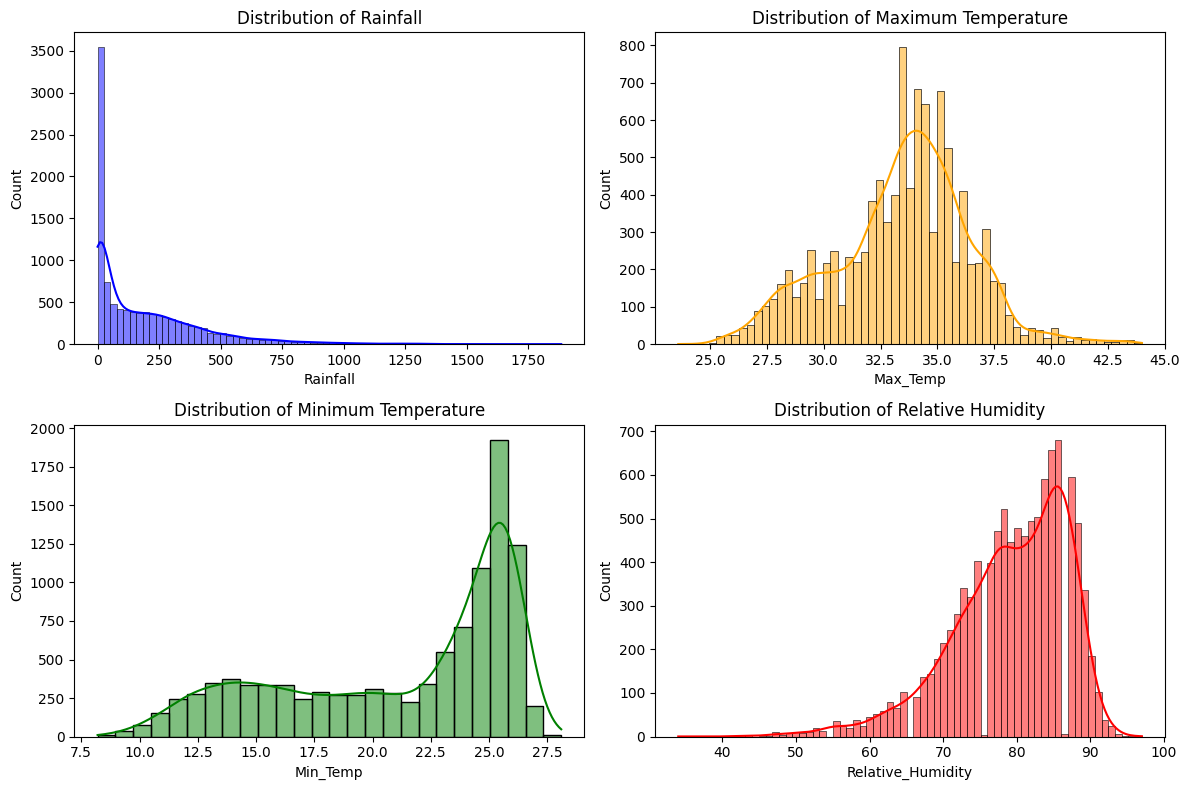

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(flood_data_cleaned['Rainfall'], kde=True, color='blue')
plt.title('Distribution of Rainfall')

plt.subplot(2, 2, 2)
sns.histplot(flood_data_cleaned['Max_Temp'], kde=True, color='orange')
plt.title('Distribution of Maximum Temperature')

plt.subplot(2, 2, 3)
sns.histplot(flood_data_cleaned['Min_Temp'], kde=True, color='green')
plt.title('Distribution of Minimum Temperature')

plt.subplot(2, 2, 4)
sns.histplot(flood_data_cleaned['Relative_Humidity'], kde=True, color='red')
plt.title('Distribution of Relative Humidity')

plt.tight_layout()
plt.show()

## **Feature** **Engineering**






In [12]:
flood_data_cleaned['Temp_Diff'] = flood_data_cleaned['Max_Temp'] - flood_data_cleaned['Min_Temp']
flood_data_cleaned['Rainfall_Squared'] = flood_data_cleaned['Rainfall'] ** 2

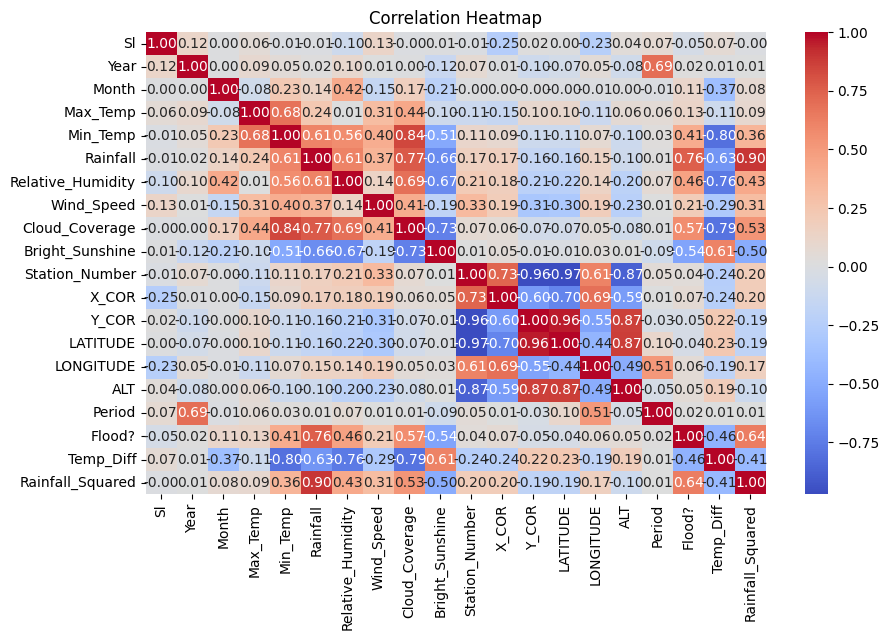

In [13]:

numerical_data = flood_data_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X = flood_data_cleaned[['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine', 'Temp_Diff', 'Rainfall_Squared']]
y = flood_data_cleaned['Flood?']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"---{model_name}---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred, model_name)

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

---Logistic Regression---
Accuracy: 0.9342
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1667
         1.0       0.87      0.80      0.83       431

    accuracy                           0.93      2098
   macro avg       0.91      0.89      0.90      2098
weighted avg       0.93      0.93      0.93      2098



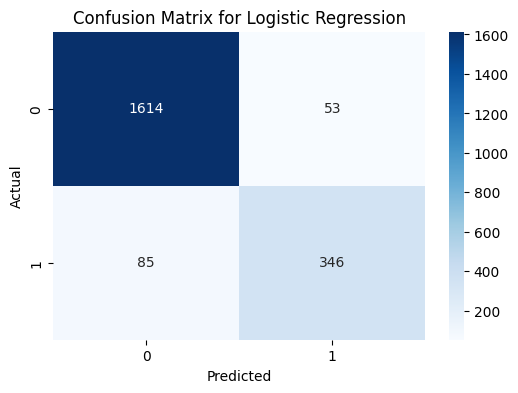

In [19]:
y_pred_logistic = logistic_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

---Random Forest---
Accuracy: 0.9423
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1667
         1.0       0.89      0.83      0.85       431

    accuracy                           0.94      2098
   macro avg       0.92      0.90      0.91      2098
weighted avg       0.94      0.94      0.94      2098



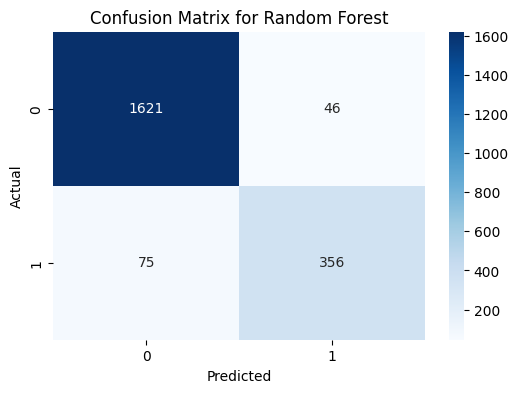

In [21]:
y_pred_rf = rf_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [22]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

---Support Vector Machine (SVM)---
Accuracy: 0.9337
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1667
         1.0       0.87      0.79      0.83       431

    accuracy                           0.93      2098
   macro avg       0.91      0.88      0.89      2098
weighted avg       0.93      0.93      0.93      2098



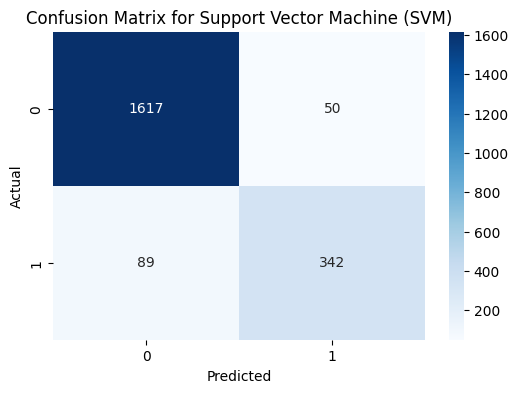

In [23]:
y_pred_svm = svm_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")

In [24]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_logistic),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_svm)]

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

---K-Nearest Neighbors (KNN)---
Accuracy: 0.9347
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1667
         1.0       0.86      0.81      0.84       431

    accuracy                           0.93      2098
   macro avg       0.91      0.89      0.90      2098
weighted avg       0.93      0.93      0.93      2098



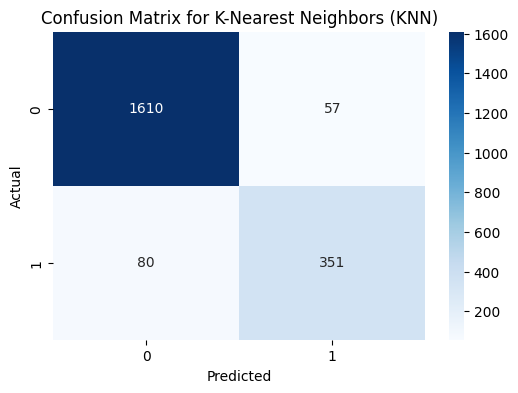

In [26]:
y_pred_knn = knn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

In [27]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_logistic),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_knn)]

<ipython-input-28-257d49bb36d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=models, y=accuracies, palette='coolwarm')


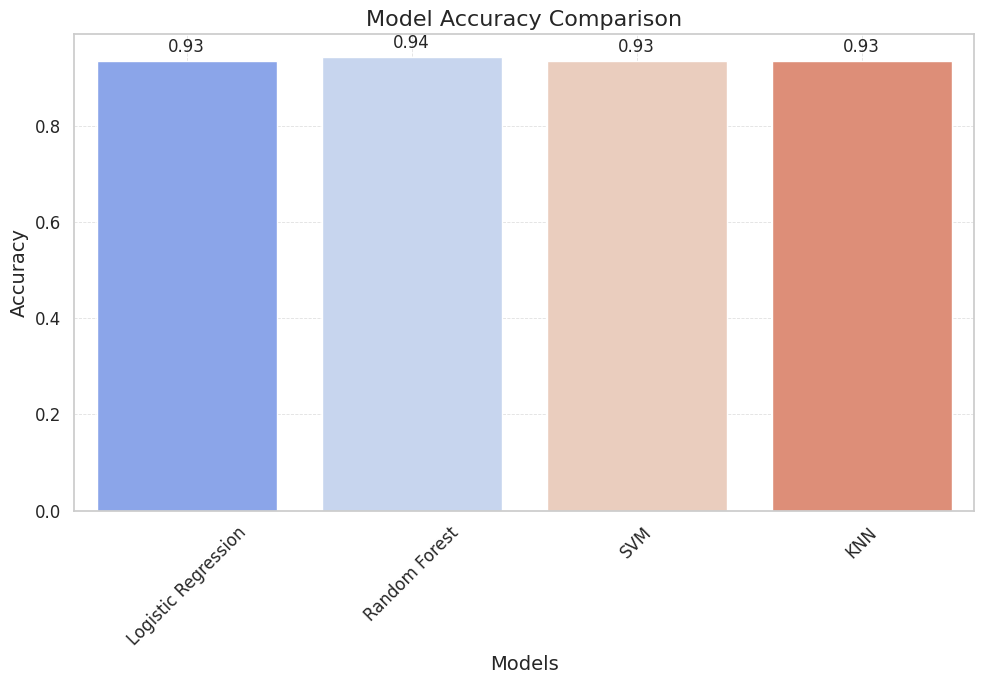

In [28]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
bar = sns.barplot(x=models, y=accuracies, palette='coolwarm')

for p in bar.patches:
    bar.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.01, f'{p.get_height():.2f}', ha="center", va='bottom')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [30]:
risk_categories = []
for prob in y_prob_rf:
    if prob > 0.75:
        risk_categories.append('High Risk')
    elif 0.25 < prob <= 0.75:
        risk_categories.append('Medium Risk')
    else:
        risk_categories.append('Low Risk')

In [31]:
X_test_original = X_test.reset_index(drop=True)

original_indices = X_test.index

districts = flood_data_cleaned.loc[X_test.index, 'Station_Names'].reset_index(drop=True)

In [32]:
risk_df = pd.DataFrame({
    'Station_Name': districts,
    'Predicted_Probability': y_prob_rf,
    'Risk_Level': risk_categories
})

In [33]:
print(risk_df)

     Station_Name  Predicted_Probability   Risk_Level
0           Dhaka                   0.00     Low Risk
1          Hatiya                   0.32  Medium Risk
2         Comilla                   0.86    High Risk
3           Bogra                   0.01     Low Risk
4           Bogra                   0.00     Low Risk
...           ...                    ...          ...
2093      Ishurdi                   0.00     Low Risk
2094     Dinajpur                   0.18     Low Risk
2095      Jessore                   0.00     Low Risk
2096      Jessore                   0.03     Low Risk
2097         Feni                   0.01     Low Risk

[2098 rows x 3 columns]


<ipython-input-34-f24b6b92df5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=risk_df, x='Risk_Level', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'])


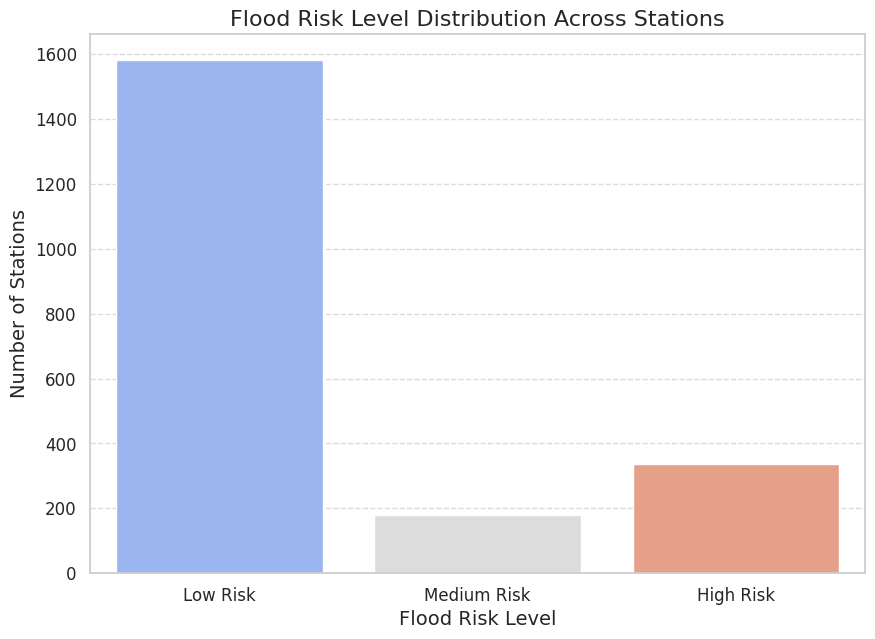

In [34]:
plt.figure(figsize=(10, 7))
sns.countplot(data=risk_df, x='Risk_Level', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Flood Risk Level Distribution Across Stations', fontsize=16)
plt.xlabel('Flood Risk Level', fontsize=14)
plt.ylabel('Number of Stations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

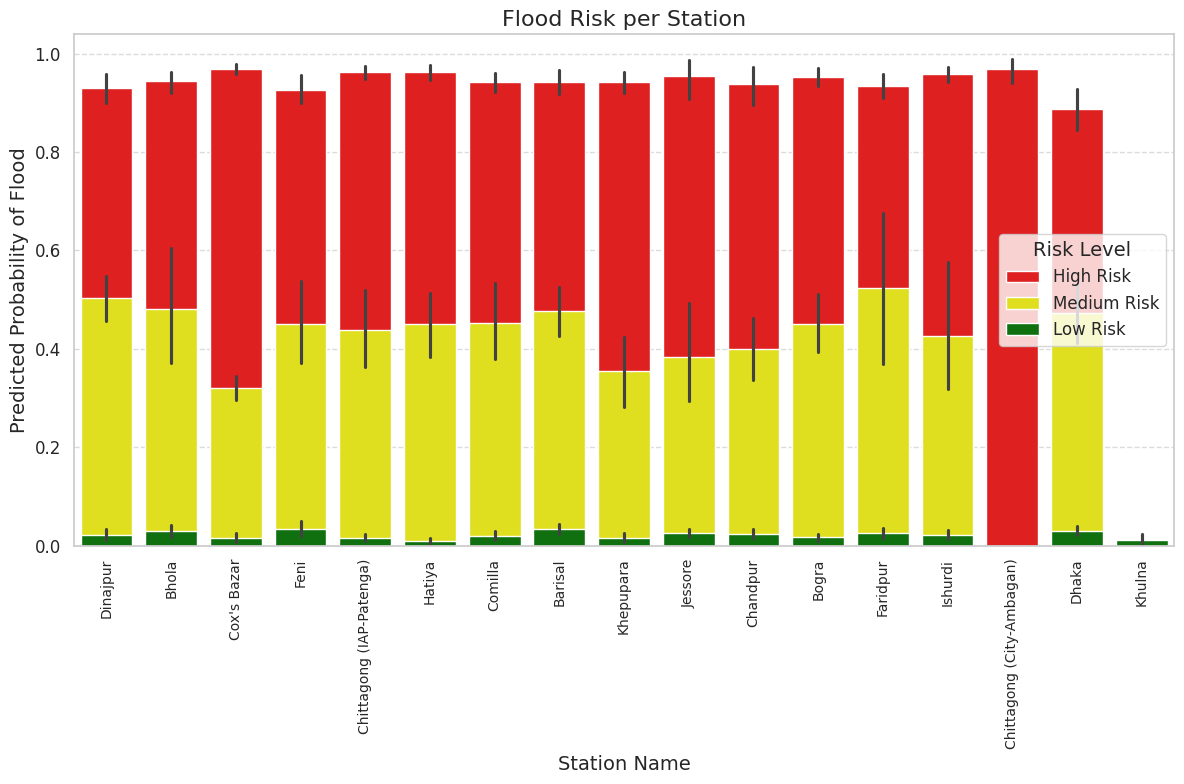

In [35]:
plt.figure(figsize=(12, 8))

palette = {
    'Low Risk': 'green',
    'Medium Risk': 'yellow',
    'High Risk': 'red'
}

sns.barplot(data=risk_df.sort_values('Predicted_Probability', ascending=False),
            x='Station_Name',
            y='Predicted_Probability',
            hue='Risk_Level',
            dodge=False,
            palette=palette)

plt.title('Flood Risk per Station', fontsize=16)
plt.xlabel('Station Name', fontsize=14)
plt.ylabel('Predicted Probability of Flood', fontsize=14)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.legend(title='Risk Level', fontsize=12, title_fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [42]:
X_test_original = X_test.reset_index(drop=True)
districts = flood_data_cleaned['Station_Names'].iloc[X_test.index].reset_index(drop=True)


In [43]:
risk_df = pd.DataFrame({
    'Station_Name': districts,
    'Predicted_Probability': y_prob_rf,
    'Risk_Level': risk_categories,
    'Month': flood_data_cleaned['Month'].iloc[X_test.index].reset_index(drop=True)
})

In [44]:
print(risk_df.head())

  Station_Name  Predicted_Probability   Risk_Level  Month
0        Dhaka                   0.00     Low Risk      2
1       Hatiya                   0.32  Medium Risk      5
2      Comilla                   0.86    High Risk      9
3        Bogra                   0.01     Low Risk      5
4        Bogra                   0.00     Low Risk      3


In [50]:
monthly_station_risk = risk_df.groupby(['Month', 'Station_Name']).agg({'Predicted_Probability': 'mean'}).reset_index()

In [52]:
pivot_risk = monthly_station_risk.pivot(index="Station_Name", columns="Month", values="Predicted_Probability").fillna(0)


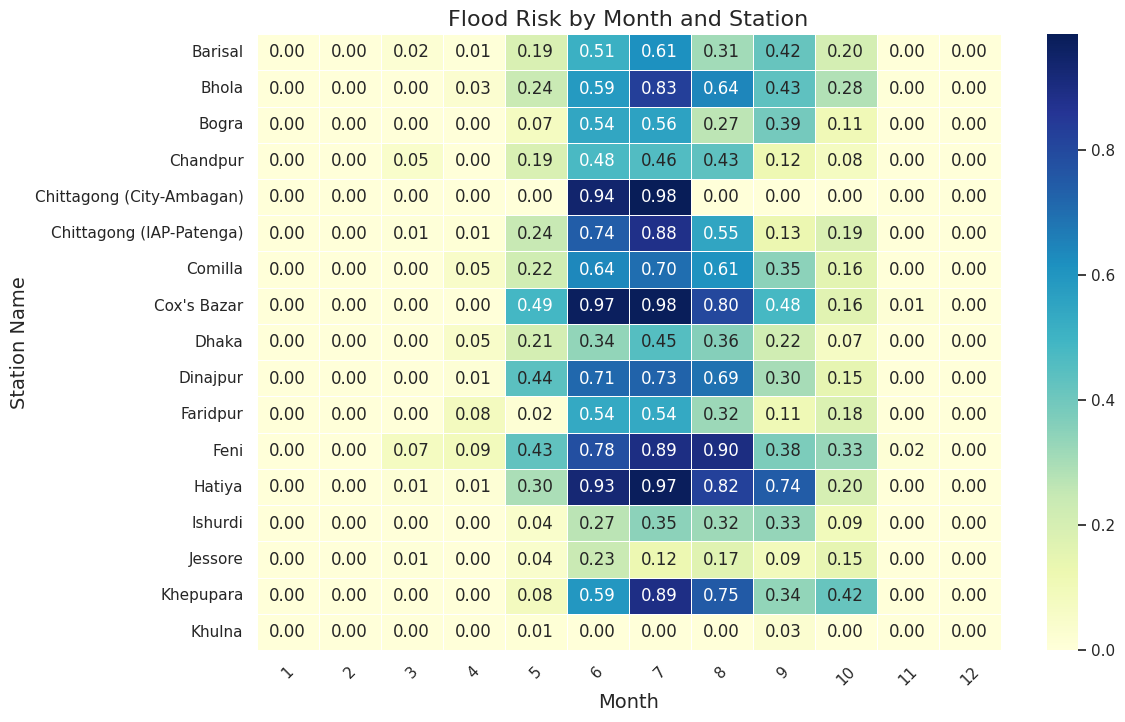

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_risk, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Flood Risk by Month and Station', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Station Name', fontsize=14)
plt.xticks(rotation=45)
plt.show()